### 1.逻辑回归

逻辑回归不是一个回归算法，而是一个二分类算法。因为逻辑回归是一个基于多元线性回归的算法，因此是一个线性的分类器。当它做多分类任务时，是形成多个相互独立的二分类，然后集合来进行判断

多元线性回归预测y使用的$\hat{y} = h_\theta(x) =\theta^Tx$，注意区分于逻辑回归

#### sigmoid函数

$y = \frac{1}{1+e^{-z}}$ z的范围是负无穷到正无穷，y的取值范围是0-1

<img src="./Img/13.png" width="40%" height="40%">   

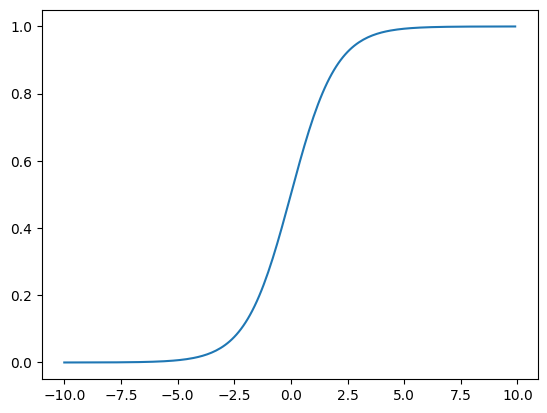

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt

def sigmod(x):
    a = []
    for item in x:
        a.append(1.0/(1.0 + math.exp(-item)))
    return a

x = np.arange(-10,10,0.1)
y = sigmod(x)

plt.plot(x,y)
plt.show()

#### Sigmoid作用

逻辑回归就是在多元线性回归基础上把结果缩放到0到1之间。$h_\theta(x)$越接近+1越是正例，$h_\theta(x)$越接近0越是负例，根据中间0.5分为两类。

$$ \hat{y} = h_\theta(x) = g(\theta^Tx) = \frac{1}{1+e^{\theta^Tx}}$$
上述的式子就是我们想要的预测值，它将会被应用于损失函数的计算中

<img src="./Img/14.png" width="40%" height="40%">   

这个图就是一个完整的神经网络训练过程：  
  
初始化随机参数θ -->  求解出$\theta^Tx$  -->  计算sigmoid也即$\hat{y}$  -->  由$y、\hat{y}$计算出损失函数公式  -->  损失函数求导更新参数θ  -->  

最后网络完成了收敛后，我们可以根据sigmoid计算出来的值（0-1之间），如果大于0.5就是1，小于0.5就是0，完成了二分类任务

#### 损失函数的推导

最大似然估计思想：根据若干已知的X，y(训练集)找到一组W使得X作为已知条件下，y发生的概率最大

逻辑回归中$g(w,x)$的输出含义为$P(y=1|w,x)$，那么$P(y=0|w,x)=1-g(w,x)$

只要让我们的P(right)在训练集上最大，$g(w,x)$就是最好的解：  
$$P(right)=(g(w,x_i))^{y_i}*(1-g(w,x_i))^{1-y_i}$$
对于$y_i$我们逻辑回归只有两个值，0、1，这也就满足了分段函数的整合要求

假设所有的训练样本是相互独立，我们可以得到总的似然函数就是m个P(right)连乘，最后我们通过对这个总的似然函数进行变换就可以得到损失函数

但是由于我们推导过来的是最大似然函数，而我们损失函数一般求最小，那么我们只需加上一个负号即可，故最终逻辑回归的损失函数：
$$J(\theta) = -[\sum_{i=1}^{m}y_ilogh_\theta(x_i)+(1-y_i)log(1-h_\theta(x_i))]$$

In [20]:
from sklearn.datasets import load_breast_cancer # 导入乳腺癌数据集
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale

# 加载乳腺癌数据集
data = load_breast_cancer()
# 选择前两个特征并进行标准化作为自变量，同时提取标签作为因变量
x,y = scale(data['data'][:,:2]), data['target']
x,y

(array([[ 1.09706398, -2.07333501],
        [ 1.82982061, -0.35363241],
        [ 1.57988811,  0.45618695],
        ...,
        [ 0.70228425,  2.0455738 ],
        [ 1.83834103,  2.33645719],
        [-1.80840125,  1.22179204]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
        0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
        1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
        1, 1, 1, 0, 1, 1, 1, 

In [25]:
# 求出两个维度对应的数据在逻辑回归算法下的最优解，这里False表示将不计算w0
lr = LogisticRegression(fit_intercept=False)
# 训练逻辑回归模型
lr.fit(x,y) 
# 分别把两个维度所对应的参数w1和w2取出来
θ1 = lr.coef_[0,0]
θ2 = lr.coef_[0,1]

array([[-3.54558873, -0.83392173]])

In [22]:
# 已知w1和w2的情况下，传进来数据的x，返回数据的y_predict
def p_theta_function(features, w1, w2):
    z = w1*features[0] + w2*features[1]
    return 1 / (1+np.exp(-z))

In [23]:
# 传入一份已知的数据的x,y，如果已知w1和w2的情况下，计算对应这份数据的Loss损失
def loss_function(samples_features, samples_labels, w1, w2):
    result = 0
    # 遍历数据集中的每一条样本，并且计算每条样本的损失，加到result身上得到整体的数据集损失
    for features, label in zip(samples_features,samples_labels):
        # 这是计算一条样本的y_predict
        p_result = p_theta_function(features,w1,w2)
        loss_result = -1*label*np.log(p_result) - (1-label)*np.log(1-p_result)
        result += loss_result
    return result

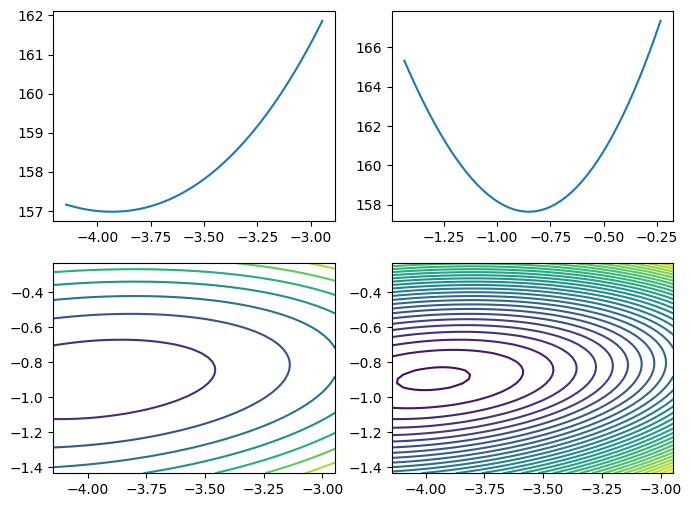

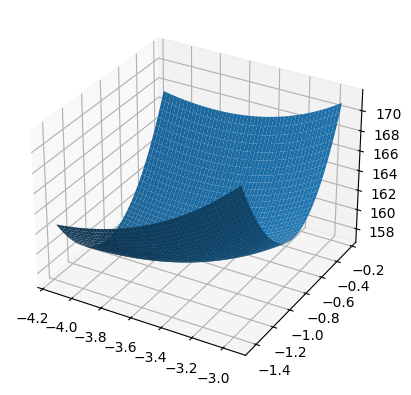

In [27]:
# 给出θ的范围上创建一定数量的θ，用来可视化
θ1_space = np.linspace(θ1-0.6,θ1+0.6,50)
θ2_space = np.linspace(θ2-0.6,θ2+0.6,50)

result1_ = np.array([loss_function(x,y,i,θ2) for i in θ1_space])
result2_ = np.array([loss_function(x,y,θ1,i) for i in θ2_space])

# 创建一个图形，大小为8x6，是对于每一个子图的
fig1 = plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
plt.plot(θ1_space,result1_)

plt.subplot(2,2,2)
plt.plot(θ2_space,result2_)

plt.subplot(2,2,3)
θ1_grid, θ2_grid = np.meshgrid(θ1_space,θ2_space)
loss_grid = loss_function(x,y,θ1_grid,θ2_grid)
plt.contour(θ1_grid,θ2_grid,loss_grid)

plt.subplot(2,2,4)
plt.contour(θ1_grid,θ2_grid,loss_grid,30)

fig2 = plt.figure()
ax = fig2.add_subplot(projection='3d') # 创建3D子图
ax.plot_surface(θ1_grid,θ2_grid,loss_grid) # 绘制3D表面图
 
plt.show()

#### 损失函数求导

$$grad = \frac{\partial}{\partial \theta_j}J(\theta) = \frac{1}{m}\sum_{i=1}^{m}(h_\theta(x_i)-y_i)x_{ij}$$

我们可以知道对于多元线性回归，$h_\theta(x_i)=\theta^Tx_i$，而对于逻辑回归，$h_\theta(x_i)=\frac{1}{1+e^{\theta^Tx}}$

因此，我们整体的更新参数的过程就有了，求$grad$，$\theta^{t+1} = \theta^t - learning_rate*grad$，不断循环，直至收敛

### 2.Softmax回归

softmax是做多分类的算法，多项式分布

$$h_\theta(x_i) = \begin{bmatrix} p(y_i=1|x_i;\theta)\\p(y_i=2|x_i;\theta)\\\vdots\\p(y_i=k|x_i;\theta) \end{bmatrix} = \frac{1}{\sum_{j=1}^ke^{\theta_j^Tx_i}}\begin{bmatrix} e^{\theta_1^Tx_i}\\e^{\theta_2^Tx_i}\\\vdots\\e^{\theta_k^Tx_i}\end{bmatrix}$$

<img src="./Img/15.png" width="40%" height="40%">  

$\theta_1 = w{11}*x_1 + w{21}x_2 + \cdots + w_{m1}x_m + b_1$，以此类推，我们得到了$\theta_1,\theta_2,\cdots,\theta_k$，然后再计算$h_\theta(x_i)$，得到$t_1,t_2,\cdots,t_k$(总和为1)，即可完成分类的判断

#### 交叉熵损失函数（softmax损失函数）

$$
J(\theta) = -\frac{1}{m}[\sum_{i=1}^{m}\sum_{j=1}^{k}I\{y_i=j\}log\frac{e^{\theta_j^Tx_i}}{\sum_{l=1}{k}e^{\theta_l^Tx_i}}] = -\frac{1}{m}\sum_{i=1}^{m}\sum_{j=1}^{k}\eta_jlogP_j
$$
$\eta_j$是所看样本属于第j个类别的概率，$P_j$是所看样本属于第j个类别预测出来的概率

softmax损失函数当k=2是就是逻辑回归的损失函数；softmax回归就是参数为$\theta_2-\theta_1$的逻辑回归

#### softmax多分类适用于只可能的情况，逻辑回归的多分类使用于想查看多个不同情况的分类（医疗癌症）